<a href="https://colab.research.google.com/github/shivanishimpi/MLnow_2.0/blob/main/02_ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Exploratory Data Analysis`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: May 30, 2021


**Author**:
 Shivani Shimpi 

**Reach out**:
[Email](https://www.google.com/intl/en-GB/gmail/about/#) | [GitHub](https://github.com/shivanishimpi) | [LinkedIn](https://www.linkedin.com/in/shivani-shimpi-5113a8170/)



Feel free to check out my [website](http://shivanishimpi.github.io/) for more information about me

For Friday's session [Click Here](#scrollTo=WbgZUP13sTIM)

## Setup

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cd '/content/drive/MyDrive/Courses/ML.now()/LiveCodeSession/02_EDA/student'

/content/drive/MyDrive/Courses/ML.now()/LiveCodeSession/02_EDA/student


In [9]:
ls

student-mat.csv     student-merge.R  student.txt
student-mat.gsheet  student-por.csv


Importing the necessary libraries for data processing

In [10]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

To load the data, we have a 

In [13]:
# mathData = pd.read_csv('student-mat.csv') #load the csv file as dataframe
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [16]:
mathData.tail() #default is the number 5 if you dont specify anything

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [17]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


## Data Processing

Categorical to numeric value conversion

In [ ]:
#unique classes/categories in every column 

# variable.column.unique() --> all {column} values from the {variable} dataframe and print out the unique ones. 

print(f'school: {mathData.school.unique()}')
print(f'sex: {mathData.sex.unique()}')
print(f'address: {mathData.address.unique()}')
print(f'Mjob: {mathData.Mjob.unique()}')
print(f'Fjob: {mathData.Fjob.unique()}')
print(f'higher: {mathData.higher.unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


Considering the 
```
mathData['school'] = mathData['school'].apply({'GP':1, 'MS':2}.get)
```

Access the column `school` from the variable `mathData` (which has the pandas dataframe).
Once we access it, since we are using a dictionary we will replace the string / categorical values with numeric data.

Meaning --> 
- Replace `GP` with 1
- Replace `MS` with 2

In [18]:
#convert the categories into numbers 

#binary valued

mathData['school'] = mathData['school'].apply({'GP':1, 'MS':2}.get)
mathData['sex'] = mathData['sex'].apply({'F':1, 'M':2}.get)
mathData['address'] = mathData['address'].apply({'U':1, 'R':2}.get)
mathData['higher'] = mathData['higher'].apply({'yes':1, 'no':2}.get)


#multi-valued
mathData['Mjob'] = mathData['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
mathData['Fjob'] = mathData['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

mathData.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,GT3,A,4,4,1,5,course,mother,2,2,0,yes,no,no,no,yes,1,no,no,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,GT3,T,1,1,1,3,course,father,1,2,0,no,yes,no,no,no,1,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,LE3,T,1,1,1,3,other,mother,1,2,3,yes,no,yes,no,yes,1,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,GT3,T,4,2,2,4,home,mother,1,3,0,no,yes,yes,yes,yes,1,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,GT3,T,3,3,3,3,home,father,1,2,0,no,yes,yes,no,yes,1,no,no,4,3,2,1,2,5,4,6,10,10
5,1,2,16,1,LE3,T,4,3,4,3,reputation,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,4,2,1,2,5,10,15,15,15
6,1,2,16,1,LE3,T,2,2,3,3,home,mother,1,2,0,no,no,no,no,yes,1,yes,no,4,4,4,1,1,3,0,12,12,11
7,1,1,17,1,GT3,A,4,4,3,5,home,mother,2,2,0,yes,yes,no,no,yes,1,no,no,4,1,4,1,1,1,6,6,5,6
8,1,2,15,1,LE3,A,3,2,4,3,home,mother,1,2,0,no,yes,yes,no,yes,1,yes,no,4,2,2,1,1,1,0,16,18,19
9,1,2,15,1,GT3,T,3,4,3,3,home,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,5,1,1,1,5,0,14,15,15


In [20]:
#@title Begin from Friday


print("Yay! Today's friday")

Yay! Today's friday


In [ ]:
#consider the below columns from the DataFrame

mathData = mathData[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2', 'G3']]

In [ ]:
mathData.head()

,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,1,1,1,1,5,1,3,2,6,5,6,6
1,1,1,1,1,3,1,3,2,4,5,5,6
2,1,1,1,1,3,1,3,2,10,7,8,10
3,1,1,1,2,4,1,2,3,2,15,14,15
4,1,1,1,3,3,1,3,2,4,6,10,10


In [ ]:
mathData.to_csv('cleanedMathData.csv') #export the mathData as cleanedMathData as csv file

In [ ]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv


## Data visualization

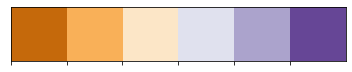

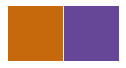

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
mathData.columns #columns in the dataframe

Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

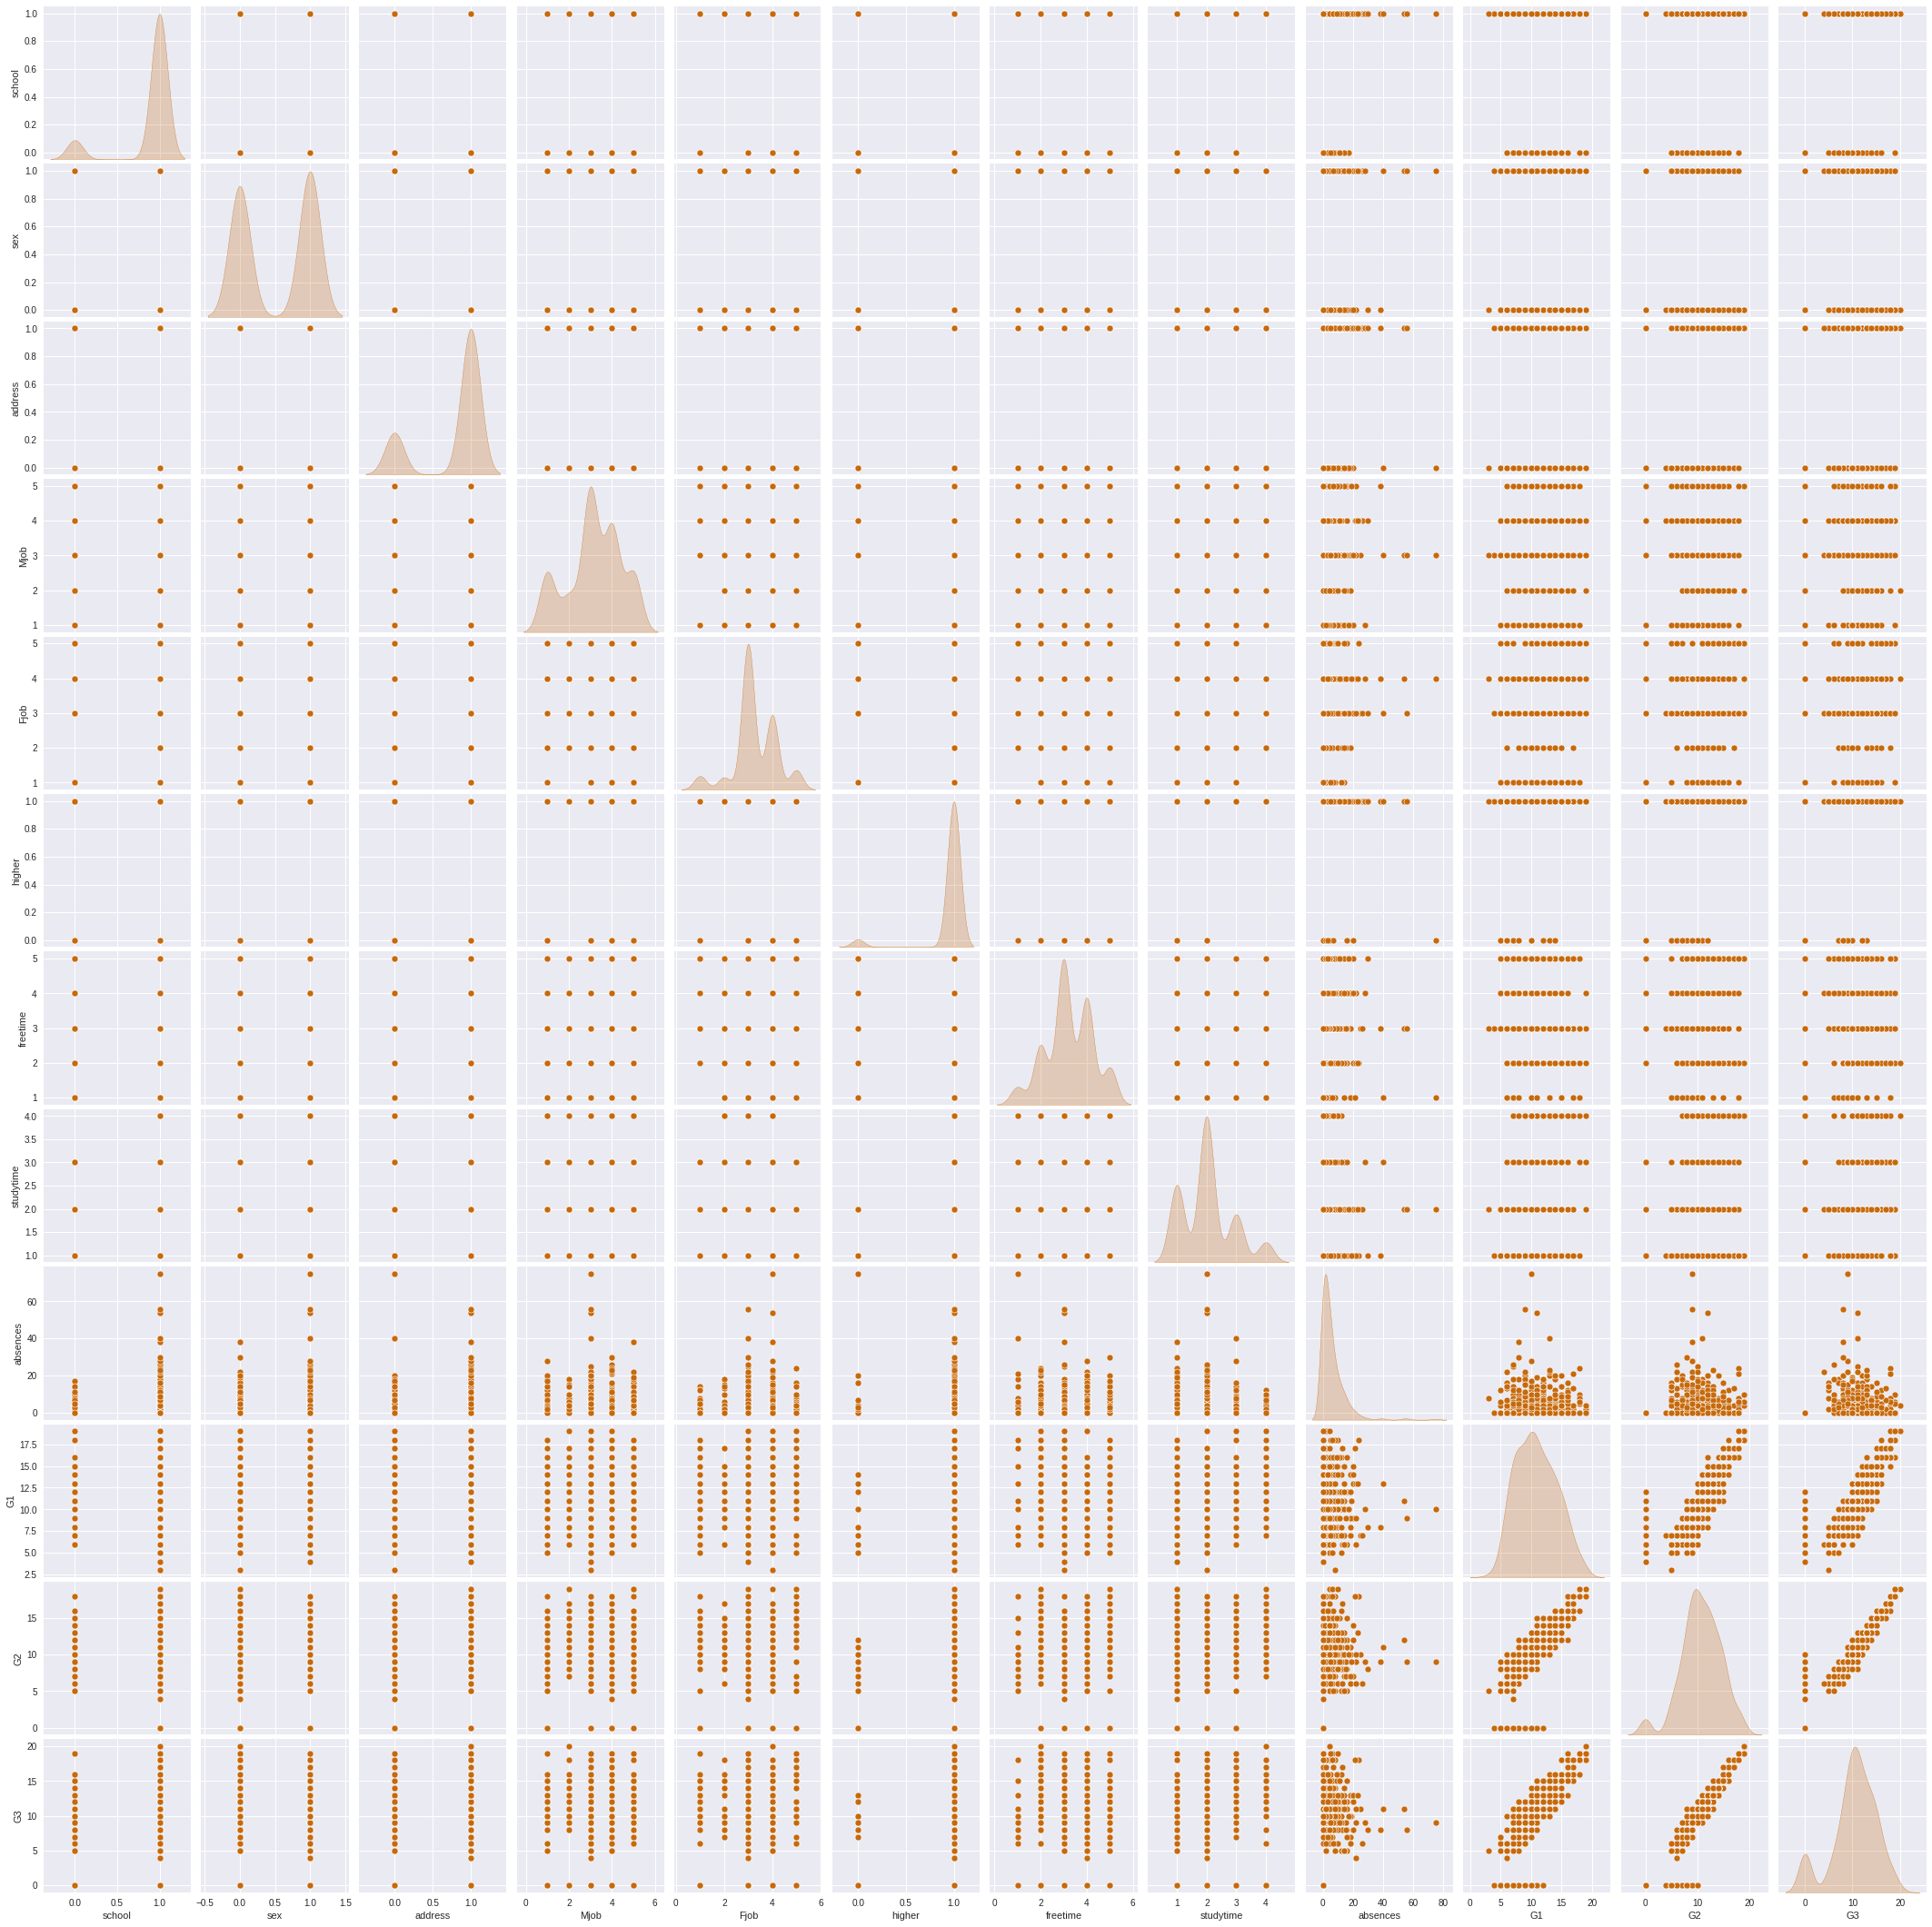

In [ ]:
#pairplot for all the values

sns.pairplot(mathData,
             x_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
             y_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
       diag_kind='kde'
             )

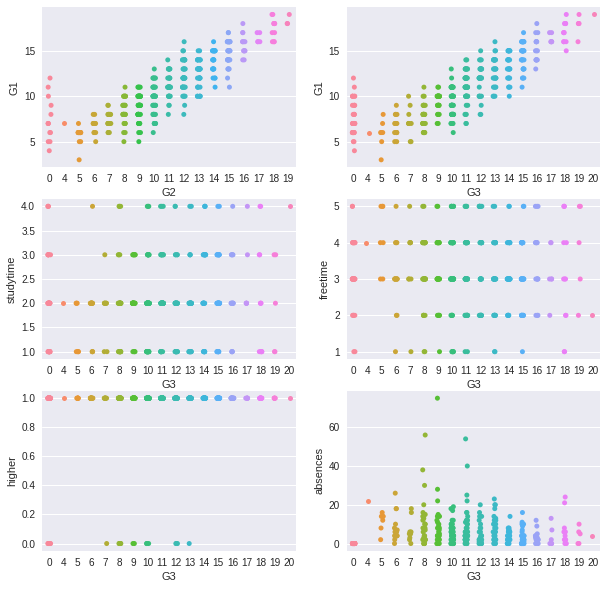

In [ ]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(y='G1', x='G2', data=mathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=mathData, hue=None, ax=axarr[0][1])
sns.stripplot(y='studytime', x='G3', data=mathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=mathData, hue=None,  ax=axarr[1][1])
sns.stripplot(y='higher', x='G3', data=mathData, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=mathData, hue=None, ax=axarr[2][1])

## Data Splits

In [ ]:
#80-20 train-test percent split

trainDataset = mathData.sample(frac=0.8, random_state=0) 
testDataset = mathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        0     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    0        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    0        1     4     3  ...          2         4  11  11  11
31       1    0        1     4     4  ...          2         0  17  16  17
32       1    0        0     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 12)
(79, 12)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        0     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    0        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    0        1     4     3  ...          2         4  11  11  11
31       1    0        1     4     4  ...          2         0  17  16  17
32       1    0        0     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [ ]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
329       1    1        1     5     5  ...         3          3         4  14  14
318       1    1        0     1     4  ...         3          3         0  11  11
317       1    1        1     3     3  ...         3          3         9   9  10
65        1    1        1     5     4  ...         4          2         2  16  15
59        1    1        1     4     3  ...         2          2         2  15  16

[5 rows x 11 columns]
    school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
9        1    0        1     3     3  ...         5          2         0  14  15
25       1    1        1     4     4  ...         2          1        14   6   9
28       1    0        1     4     3  ...         3          2         4  11  11
31       1    0        1     4     4  ...         3          2         0  17  16
32       1    0        0     5     1  ...         5          2         0  17  16